In [1]:
from IPython.display import display, HTML

# Set the width to a specific percentage of the screen width, e.g., 100%
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from os import path
from imgproj.classifier.img_configuration import ModelConf

PROJECT_ROOT = path.abspath(path.join(globals()['_dh'][0], '..'))
DATALAKE_PATH = path.abspath(path.join(PROJECT_ROOT, '..', '..', 'datalake', 'imgproj'))
FQFN_PROCESSED_DF = path.join(DATALAKE_PATH, 'processed', f'processed_20250202.{ModelConf.image_size[0]}px.jsonl')

In [3]:
from trainer import img_folder_loader

wtl = img_folder_loader.ImgFolderLoader()
wtl.read(DATALAKE_PATH, labels=['0', '1'])

Creating tasks:   0%|          | 0/2 [00:00<?, ?it/s]

Image processing:   0%|          | 0/502 [00:00<?, ?it/s]

In [9]:
df = wtl.df
df[['img_grey', 'img_height', 'img_width']]

,img_grey,img_height,img_width
0,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...",240,240
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",240,240
2,"[[241, 241, 241, 241, 241, 241, 241, 241, 241,...",240,240
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",240,240
4,"[[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, ...",240,240
...,...,...,...
497,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",240,240
498,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",240,240
499,"[[255, 255, 255, 255, 255, 253, 253, 255, 254,...",240,240
500,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",240,240


<Axes: >

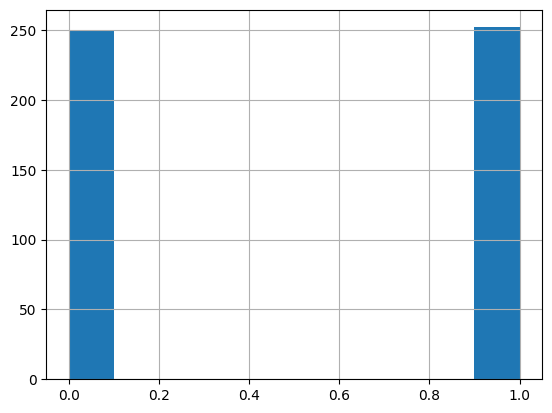

In [5]:
df['label'].hist()

In [6]:
for label in df['label'].unique():
    sampled_df = df[df['label'] == label]['img_grey'].sample(n=10)
    print(f'Sampled DataFrame for label {label}:')
    display(sampled_df)

Sampled DataFrame for label 0:


205    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
119    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
244    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
94     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
135    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
32     [[88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, ...
12     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
122    [[255, 255, 255, 255, 254, 254, 254, 254, 254,...
181    [[176, 176, 175, 173, 174, 174, 175, 176, 175,...
230    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: img_grey, dtype: object

Sampled DataFrame for label 1:


339    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
408    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
298    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
292    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
260    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
495    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
473    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
265    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
306    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
478    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Name: img_grey, dtype: object

In [7]:
df.to_json(FQFN_PROCESSED_DF, orient='records', lines=True)